In [15]:
import numpy as np
import sympy as sp
import math
from math import cos, sin
import pandas as pd

# EJERCICIO 1 (Datos) 

In [16]:
# valor de "x" y "y"
X = 2 + 1 + 8 + 2 + 7 + 3 + 7
y = (X/3)

# valores de Longitud
L1 = (0.05 * X)
L2 = (L1 * 1.5)
L3 = (0.5 * L1)

# valores de cargas

w = (0.005 * X + (0.01 * y))
p = ( 0.05 * X )

# angulo de p respecto al eje x
angulo_p = (45*np.pi/180)



# definiendo la fuerza puntual a lo largo de los tramos

# Fuerza puntual del primer triángulo a lo largo de L1

Ft1 = (L1 * w)/2

# Fuerza puntual del rectangulo a lo largo de L2

Frect = (L2 * w)

# Fuerza puntual del segundo triángulo a lo largo de L3

Ft2 = (L3 * w)/2

In [17]:
# Incógnitas y variables

Ax, Ay, Ma, x = sp.symbols ("Ax Ay Ma x")



# Equilibrio externo

In [18]:
# Equilibrio eje y 

equilibrio_y = ( Ay - Ft1 - Frect - Ft2 + (p*sin(angulo_p)))
ecuacion_y = sp.Eq(equilibrio_y, 0)

reaccion_ay = sp.solve(ecuacion_y)[0]

# Reaccion Ay en kN
reaccion_ay

-0.216910171779821

In [19]:
# Equilibrio eje x 

equilibrio_x = ( Ax - (p*cos(angulo_p)))
ecuacion_x = sp.Eq(equilibrio_x, 0)

reaccion_ax = sp.solve(ecuacion_x)[0]

# Reaccion Ax en kN
reaccion_ax               

1.06066017177982

In [20]:
# Sumatoria de momentos en A

equilibrio_momento = (Ma -(Ft1*L1*2/3) -(Frect*(L1+(L2/2))) -(Ft2*(L1+L2+(L3/3))) + (p*sin(angulo_p)*(L1+L2+L3)))
ecuacion_momento = sp.Eq(equilibrio_momento, 0)

reaccion_Ma = sp.solve(ecuacion_momento)[0]

# Reaccion Ax en kN
reaccion_Ma       

-2.73390827300920

# Ecuaciones de cortante y momento 
Por integrales

In [21]:
# Primer tramo 0 <= x <= L1

carga_distribuida = w * x/L1

# Fuerza cortante
Vx_1 = reaccion_ay - sp.integrate(carga_distribuida, x)

# Momento flector
Mx_1 = -reaccion_Ma + sp.integrate(Vx_1, x)
Mx_1

-0.0277777777777778*x**3 - 0.216910171779821*x + 2.7339082730092

In [22]:
# Segundo tramo 0 <= x <= L2

carga_distribuida = w

# Fuerza cortante
Vx_2 = Vx_1.subs(x, L1) - sp.integrate(carga_distribuida, x)

# Momento flector
Mx_2 = Mx_1.subs(x, L1) + sp.integrate(Vx_2, x)
Mx_2

-0.125*x**2 - 0.404410171779821*x + 2.31479301533947

In [23]:
# Tercer tramo 0 <= x <= L3

carga_distribuida = w * x/L3

# Fuerza cortante
Vx_3 = Vx_2.subs(x, L2) - sp.integrate(carga_distribuida, x)

# Momento flector
Mx_3 = Mx_2.subs(x, L2) + sp.integrate(Vx_3, x)
Mx_3

-0.0555555555555556*x**3 - 0.966910171779821*x + 0.772057628834872

# Gráfica de cortante

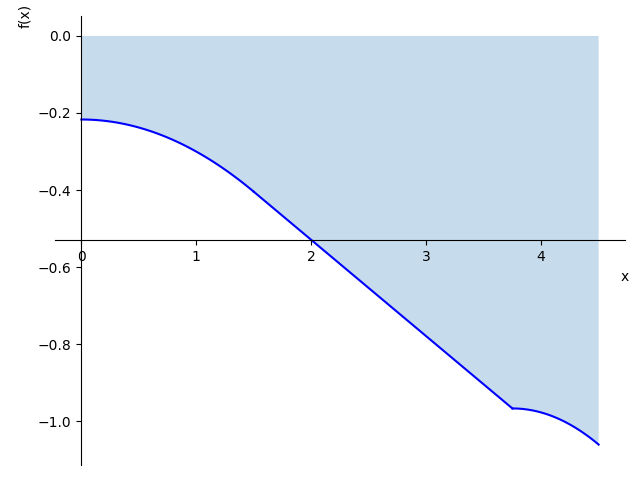

In [24]:
x_array = np.arange(0, L1+L2+L3+0.01, 0.01)

#Arrays reemplazando en la funcion de cada tramo
tramo1 = sp.lambdify(x, Vx_1)(x_array [x_array <= L1])
tramo2 = sp.lambdify(x, Vx_2)(x_array [(x_array > L1) & (x_array <= (L1+L2))]-L1)
tramo3 = sp.lambdify(x, Vx_3)(x_array [(x_array > (L1+L2))]-(L1+L2))

cortante_y = np.concatenate((tramo1, tramo2, tramo3))
sp.plot((Vx_1,(x, 0, L1)), (Vx_2.subs(x, x - L1),(x,L1, L1+L2)), (Vx_3.subs(x, x - (L1+L2)),(x,L1+L2, L1+L2+L3)), line_color = "blue", fill={'x':x_array, 'y1': cortante_y, 'alpha': 0.25})

# Gráfica de momento flector

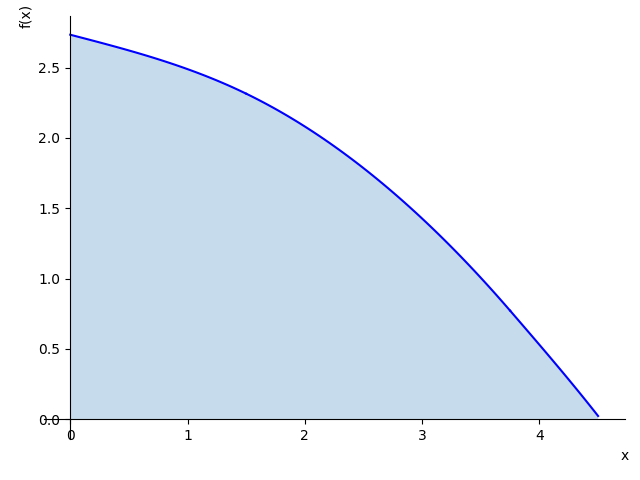

In [25]:
x_array = np.arange(0, L1+L2+L3+0.01, 0.01)

#Arrays reemplazando en la funcion de cada tramo
tramo1 = sp.lambdify(x, Mx_1)(x_array [x_array <= L1])
tramo2 = sp.lambdify(x, Mx_2)(x_array [(x_array > L1) & (x_array <= (L1+L2))]-L1)
tramo3 = sp.lambdify(x, Mx_3)(x_array [(x_array > (L1+L2))]-(L1+L2))

momento_y = np.concatenate((tramo1, tramo2, tramo3))

sp.plot((Mx_1,(x, 0, L1)), (Mx_2.subs(x, x - L1),(x,L1, L1+L2)), (Mx_3.subs(x, x - (L1+L2)),(x,L1+L2, L1+L2+L3)), line_color = "blue", fill={'x':x_array, 'y1': momento_y, 'alpha': 0.25})

# Fuerza cortante y momento flector máximo

In [26]:
cortante_maximo = 0 
cortante_maximo_positivo = np.amax(cortante_y)
cortante_maximo_negativo = np.amin(cortante_y)

if np.abs (cortante_maximo_negativo) > cortante_maximo_positivo:
    cortante_maximo = np.abs (cortante_maximo_negativo)
else:
    cortante_maximo = cortante_maximo_positivo

print ('La magnitud del cortante máximo es: ', cortante_maximo, ' kN')

La magnitud del cortante máximo es:  1.0606601717798212  kN


In [27]:
momento_maximo = 0 
momento_maximo_positivo = np.amax(momento_y)
momento_maximo_negativo = np.amin(momento_y)

if np.abs (momento_maximo_negativo) > momento_maximo_positivo:
    momento_maximo = np.abs (momento_maximo_negativo)
else:
    momento_maximo = momento_maximo_positivo

print ('La magnitud del momento máximo es: ', momento_maximo, ' kNm')

La magnitud del momento máximo es:  2.7339082730092  kNm


# EJERCICIO 2

In [29]:
# Leer el excel

tabla_perfiles = pd.read_excel("T2.xlsx", usecols = "B:E", nrows=10, skiprows=3)


<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'T2.xlsx'